# K-means Clustering

In [1]:
import random

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=150, centers=5, random_state=42)

m, n = X.shape[:2]
n_iter = 50
print(m, n)

150 2


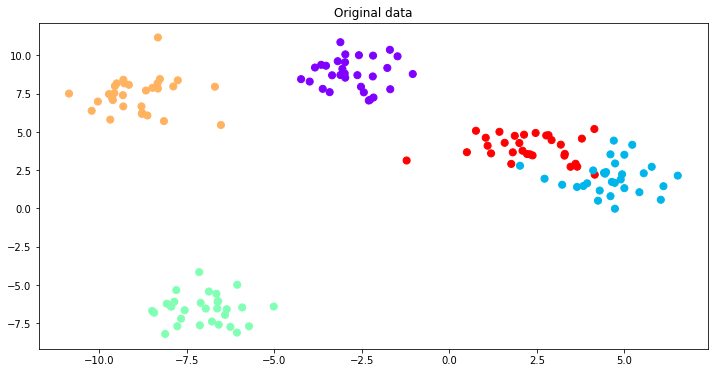

In [3]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.title('Original data')
plt.show()

In [4]:
K=5
# Create an empty centroid array.
centroids = np.array([], dtype=np.float32).reshape(0, n)
print(centroids)

[]


In [5]:
for k in range(K):
    centroids = np.r_[centroids, X[random.randint(0, m-1)].reshape(1, 2)] #randint(0,249)

centroids

array([[ 2.92190011,  4.46875108],
       [ 1.58225575,  4.29219213],
       [-1.68665271,  7.79344248],
       [-7.12501531, -7.63384576],
       [-8.26743725,  8.45908856]])

In [6]:
def find_mini(X, centroids):
  euclid = np.array([]).reshape(m,0)
  for k in range(K):
    dist = np.sum((X-centroids[k])**2, axis=1)
    euclid = np.c_[euclid, dist] 
  minimum = np.argmin(euclid, axis=1)
  return minimum

In [7]:
def find_clusters(X, n_clusters, centroids):    
    while True:
        labels = find_mini(X, centroids)
        new_centroids = np.array([X[labels==i].mean(axis=0) for i in range(n_clusters)])
        if np.all(centroids == new_centroids):
            break
        
        plt.figure(figsize=(12, 6))
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
        plt.scatter(centroids[:,0], centroids[:,1], s=100, c='black')
        plt.show()
        
        centroids = new_centroids
        # print("time")
    return centroids, labels

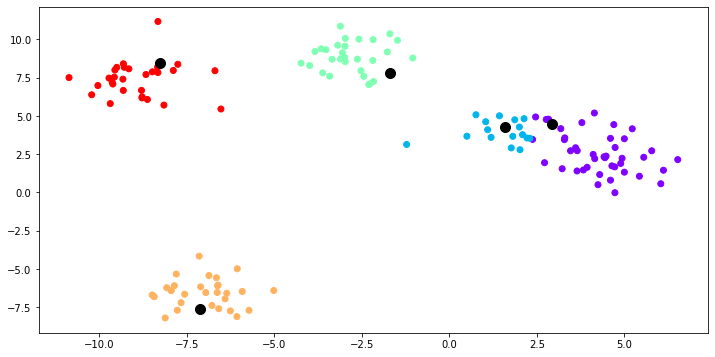

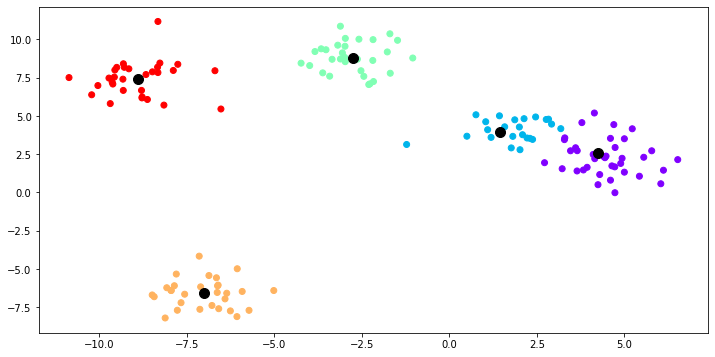

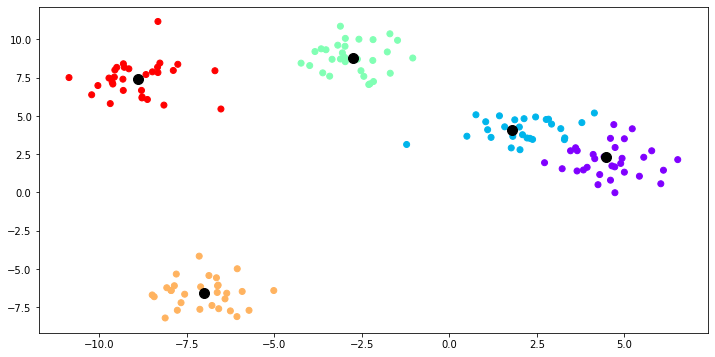

In [8]:
centers, labels = find_clusters(X, 5, centroids)